In [183]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [184]:
path = r""
df = pd.read_excel(path)
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         690 non-null    object 
 1   Age            690 non-null    object 
 2   Debt           690 non-null    float64
 3   Married        690 non-null    object 
 4   BankCustomer   690 non-null    object 
 5   Education      690 non-null    object 
 6   Ethnicity      690 non-null    object 
 7   YearsEMployed  690 non-null    float64
 8   PriorDef       690 non-null    object 
 9   Employed       690 non-null    object 
 10  CreditScore    690 non-null    int64  
 11  DriverLicense  690 non-null    object 
 12  Citizen        690 non-null    object 
 13  Zipcode        690 non-null    object 
 14  Income         690 non-null    int64  
 15  Approved       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
Education        0
Ethnicity        0
YearsEMployed    0
PriorDef         0
Employed         0
CreditScore      0
DriverLicense    0
Citizen          0
Zipcode          0
Income           0
Approved         0
dtype: int64

## Question 3: Pre-Processing data:
1. Handle missing values
2. Convert categorical(non-numeric) to numerical data

### Handling Missing values

In [185]:
# replace question mnarks with nan and imputing the missing values with most frequent values values as the data has been a combination of numerical and categorical
df = df.replace('?', np.nan)
df = df.fillna(df.mode().iloc[0])

print(df.isnull().sum())
print(df.info())

Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
Education        0
Ethnicity        0
YearsEMployed    0
PriorDef         0
Employed         0
CreditScore      0
DriverLicense    0
Citizen          0
Zipcode          0
Income           0
Approved         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         690 non-null    object 
 1   Age            690 non-null    object 
 2   Debt           690 non-null    float64
 3   Married        690 non-null    object 
 4   BankCustomer   690 non-null    object 
 5   Education      690 non-null    object 
 6   Ethnicity      690 non-null    object 
 7   YearsEMployed  690 non-null    float64
 8   PriorDef       690 non-null    object 
 9   Employed       690 non-null    object 
 10  CreditScore    690 non-null    int64  
 11  D

### Conversion to numerical data

In [186]:
# now we need to convert categorical data(non-numeric) to numeric data
Encod = LabelEncoder()
for column in df.columns:
    if df[column].dtypes=='object':
        df[column] = Encod.fit_transform(df[column])
        
print(df.isnull().sum())
# print(df.head(100))

Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
Education        0
Ethnicity        0
YearsEMployed    0
PriorDef         0
Employed         0
CreditScore      0
DriverLicense    0
Citizen          0
Zipcode          0
Income           0
Approved         0
dtype: int64


## Question 1: Important predictors

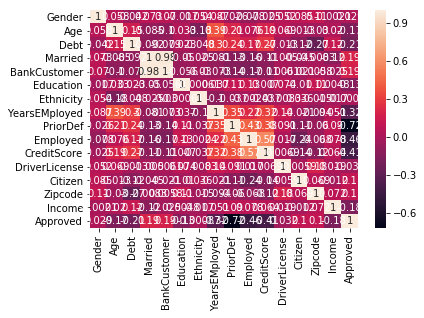

<Figure size 108000x108000 with 0 Axes>

In [187]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(1500,1500))
plt.show()

In [188]:
cor_target = abs(corrMatrix["Approved"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

PriorDef       0.720407
Employed       0.458301
CreditScore    0.406410
Approved       1.000000
Name: Approved, dtype: float64

### So the important predictors are below from Pearson Correlation:
1. Prior Default
2. Employed
3. Credit Score

## Question 2: 


   Gender  Age   Debt  Married  BankCustomer  Education  Ethnicity  \
0       1  156  0.000        1             0         12          7   
1       0  328  4.460        1             0         10          3   
2       0   89  0.500        1             0         10          3   
3       1  125  1.540        1             0         12          7   
4       1   43  5.625        1             0         12          7   

   YearsEMployed  PriorDef  Employed  CreditScore  DriverLicense  Citizen  \
0           1.25         1         1            1              0        0   
1           3.04         1         1            6              0        0   
2           1.50         1         0            0              0        0   
3           3.75         1         1            5              1        0   
4           1.71         1         0            0              0        2   

   Zipcode  Income  Approved  
0       68       0         0  
1       11     560         0  
2       96     824     

Text(0.5,1,'Debt')

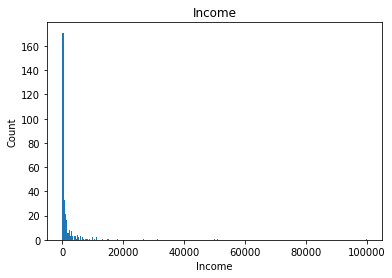

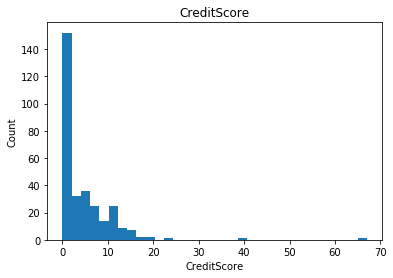

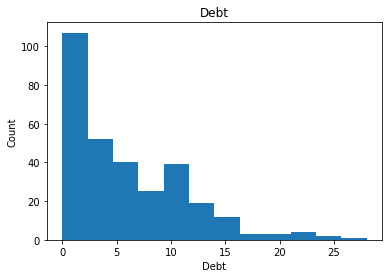

In [189]:
approved = df.loc[df['Approved'] == 0]

approved = approved.dropna()
print(approved.head())

plt.figure()
plt.hist(approved["Income"], bins = 'auto')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income')

plt.figure()
plt.hist(approved["CreditScore"], bins = 'auto')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('CreditScore')

plt.figure()
plt.hist(approved["Debt"], bins = 'auto')
plt.xlabel('Debt')
plt.ylabel('Count')
plt.title('Debt')

In [190]:
df_copy.describe()

,Debt,YearsEMployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [191]:
df_copy.median()


Debt             2.75
YearsEMployed    1.00
CreditScore      0.00
Income           5.00
dtype: float64

## Question 4

In [192]:
from numpy import *
df_selected = df[['PriorDef', 'Employed', 'CreditScore', 'Approved']]
df_selected = df_selected.astype(float32)
print(df_selected.isnull().sum())

X = df_selected[['PriorDef', 'Employed', 'CreditScore']]
y = df_selected[['Approved']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


PriorDef       0
Employed       0
CreditScore    0
Approved       0
dtype: int64


### Decision Trees

In [193]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = clf.fit(X_train, y_train)
y_dtr = clf.predict(X_test)
print('confusion_matrix: ', confusion_matrix(y_dtr, y_test))
print('accuracy_score: ', accuracy_score( y_dtr , y_test))
print('precision_score: ', precision_score( y_dtr, y_test))
print('recall_score: ', recall_score( y_dtr, y_test))

confusion_matrix:  [[54 14]
 [ 6 64]]
accuracy_score:  0.855072463768116
precision_score:  0.8205128205128205
recall_score:  0.9142857142857143


### Random Forest

In [195]:
model = RandomForestClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
y_ran = model.predict(X_test)
print('confusion_matrix: ', confusion_matrix(y_ran, y_test))
print('accuracy_score: ', accuracy_score( y_ran , y_test))
print('precision_score: ', precision_score( y_ran, y_test))
print('recall_score: ', recall_score( y_ran, y_test))

confusion_matrix:  [[54 14]
 [ 6 64]]
accuracy_score:  0.855072463768116
precision_score:  0.8205128205128205
recall_score:  0.9142857142857143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0.5,1,'ROC')

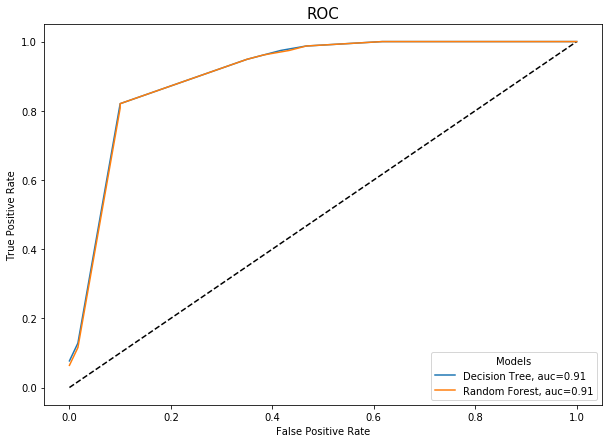

In [196]:
dt = clf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  dt)
auc1 = metrics.roc_auc_score(y_test, dt)

rf = model.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  rf)
auc2 = metrics.roc_auc_score(y_test, rf)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Decision Tree, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Random Forest, auc="+str(round(auc2,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)